## ACS Policy Memo Visualizations

This notebook produces visualizations for the ACS standard dataframes for cities of interest to be used in the policy memo documents shared with local stakeholders of the respective cities.

### Read in Data

In [1]:
# import required libraries
import os
import sys
### add system path to get other library directories
sys.path[0] = os.path.join(os.path.abspath(''),'..')

import geopandas
import warnings
import pandas as pd
import math
import statistics
import matplotlib.pyplot as plt
import contextily as cx
import zipfile
import glob
from lib import visualizations as viz
warnings.filterwarnings('ignore')

In [2]:
## if file doesn't exist then unzip
if os.path.exists("/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson"):
    ACS_2021_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson"
else:
    with zipfile.ZipFile('/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.zip', 'r') as zip_ref:
        zip_ref.extractall('/tmp/data/standard_dataframes/')
    ACS_2021_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2021.geojson"
    
if os.path.exists("/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.geojson"):
    ACS_2017_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.geojson"
else:
    with zipfile.ZipFile('/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.zip', 'r') as zip_ref:
        zip_ref.extractall('/tmp/data/standard_dataframes/')
    ACS_2017_MERGED_FILE = "/tmp/data/standard_dataframes/standard_acs_censustract_df_2017.geojson"

In [7]:
# read in the files
acs_2017_standard_df = geopandas.read_file(ACS_2017_MERGED_FILE)
acs_2021_standard_df = geopandas.read_file(ACS_2021_MERGED_FILE)

chicago_income_df_2017 = chicago_2017[chicago_2017['Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)'] > 0]

In [60]:
# adjust median household income to only include values greater than 0
acs_2017_standard_df = acs_2017_standard_df[acs_2017_standard_df['Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)'] > 0]
acs_2021_standard_df = acs_2021_standard_df[acs_2021_standard_df['Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)'] > 0]

### Create choropleth for cities

In [61]:
# create choropleth function
def create_choropleth(df1, df2, column, title1='title', title2='title'):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,12))
    
    from mpl_toolkits.axes_grid1 import make_axes_locatable
   
    # 2017 choropleth
    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    
    df1.plot(ax=ax1, column=column, legend=True, cax=cax)
    ax1.axis('off')
    ax1.set_title(title1)

    # 2021 choropleth 
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.1)
                              
    df2.plot(ax=ax2, column=column, legend=True, cax=cax)
    ax2.axis('off')
    ax2.set_title(title2)
    
    fig.tight_layout();

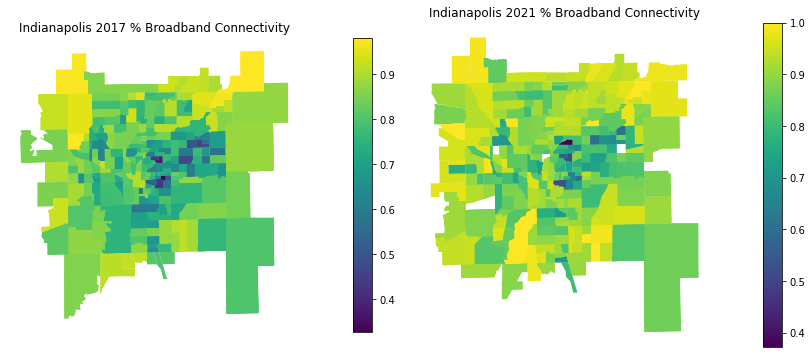

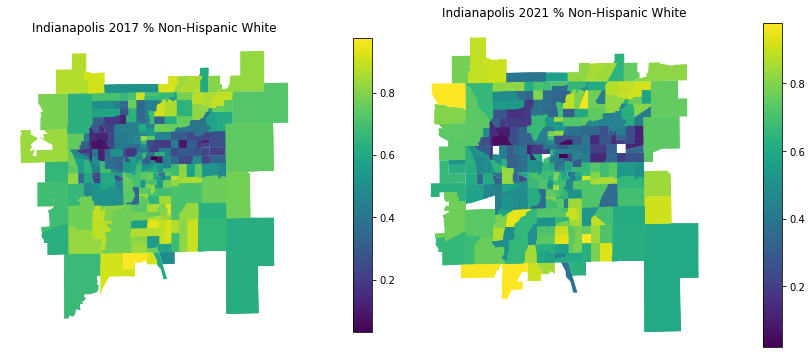

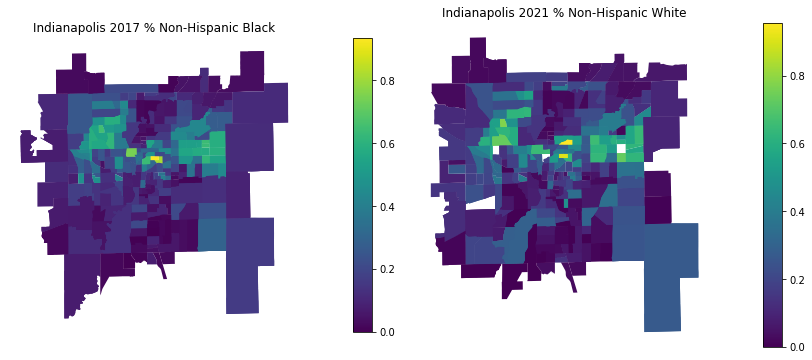

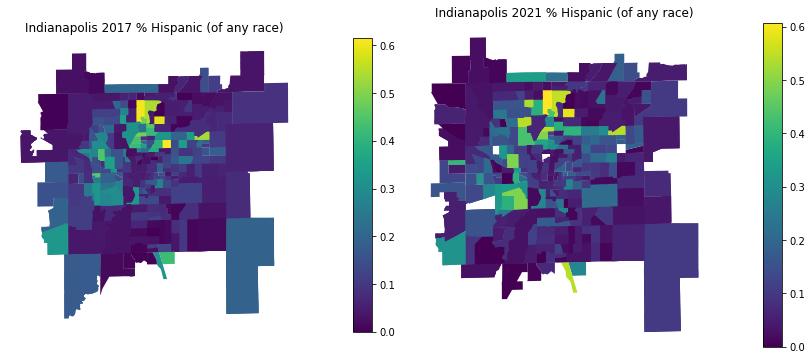

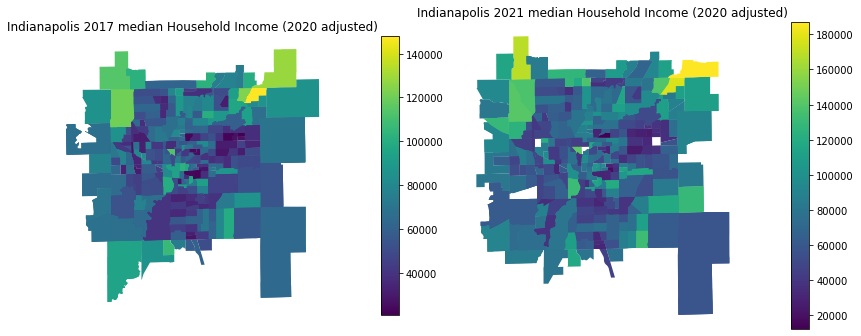

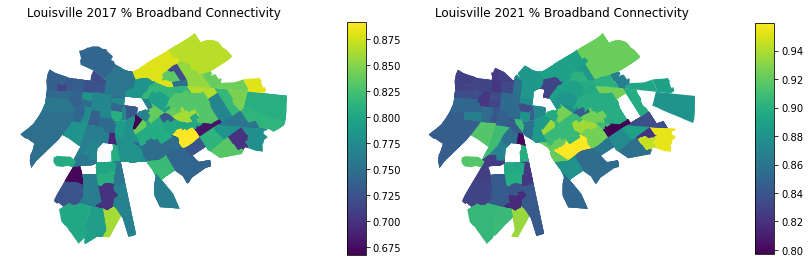

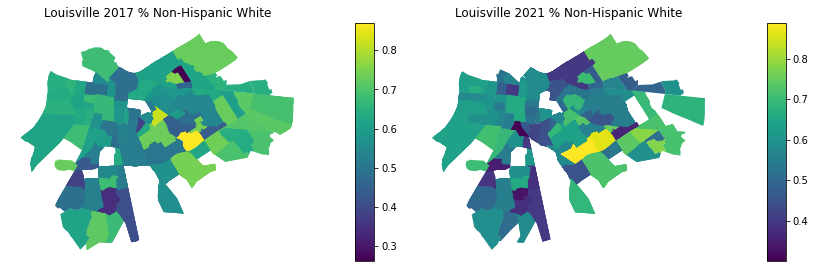

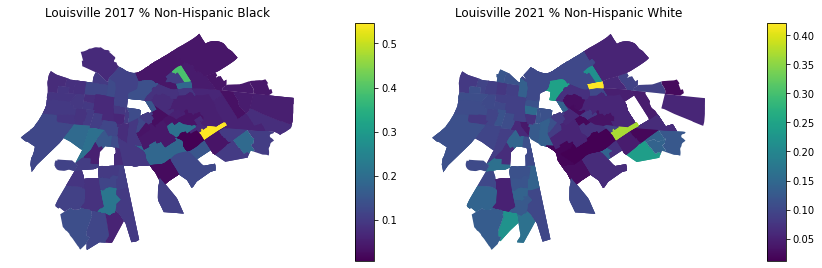

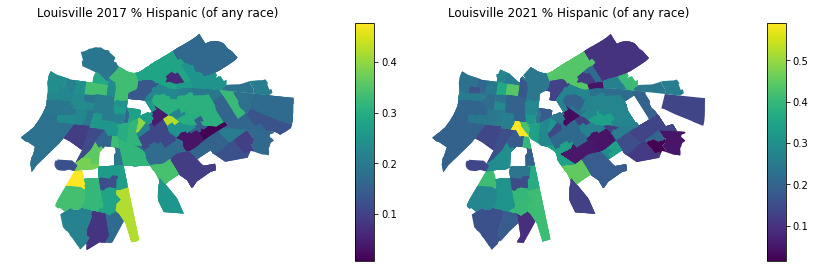

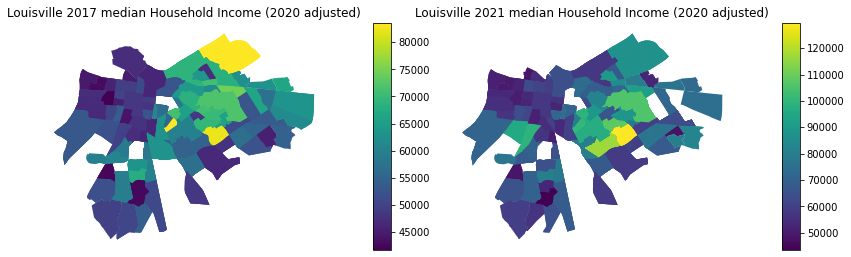

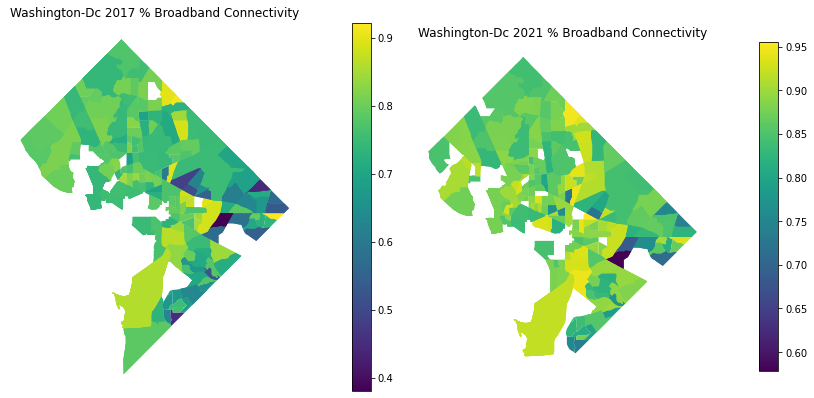

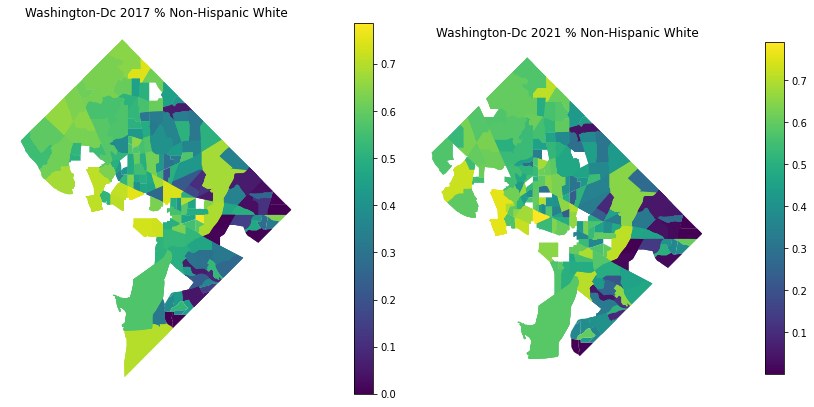

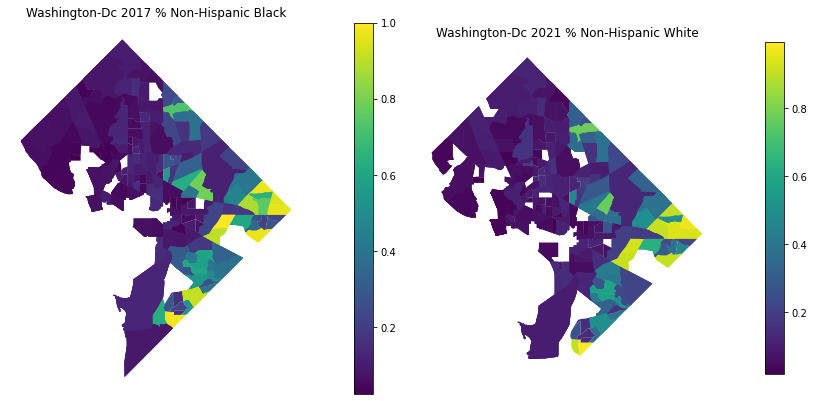

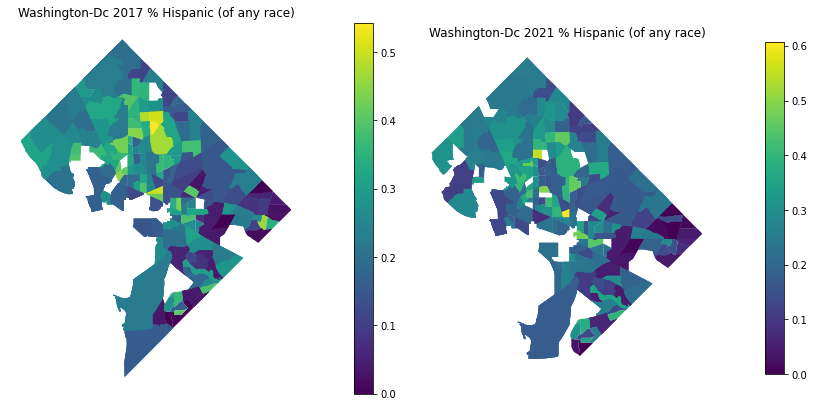

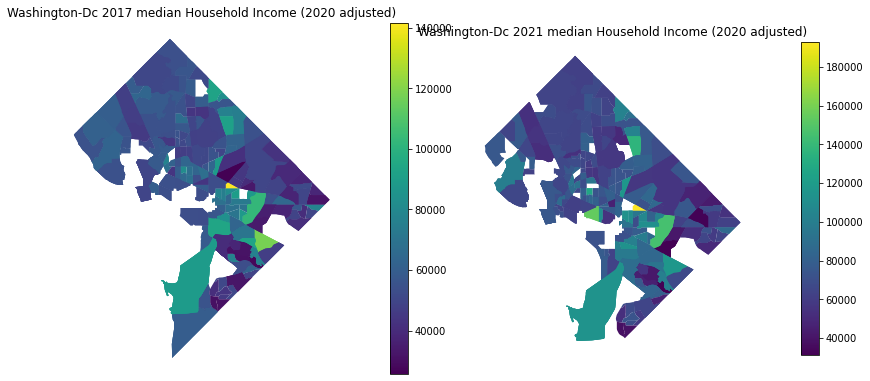

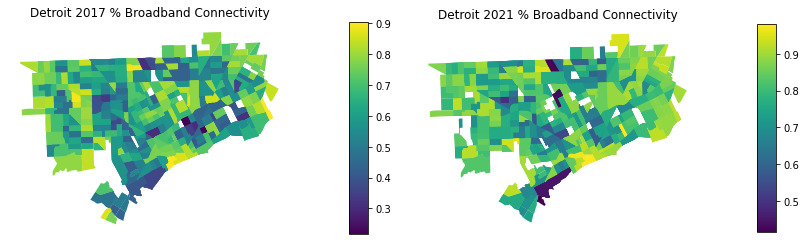

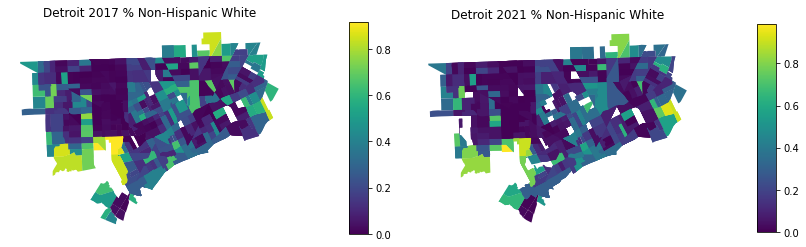

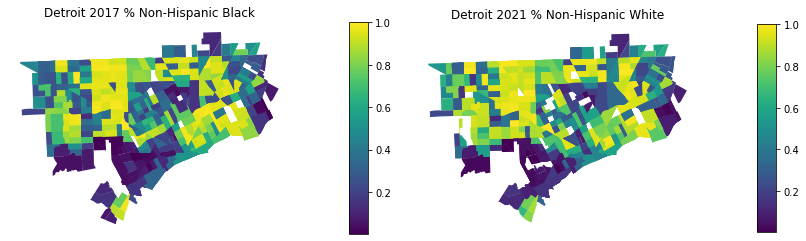

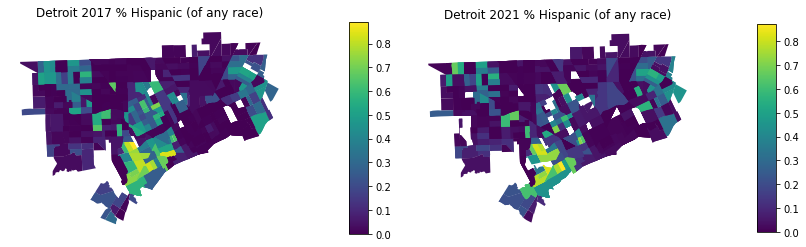

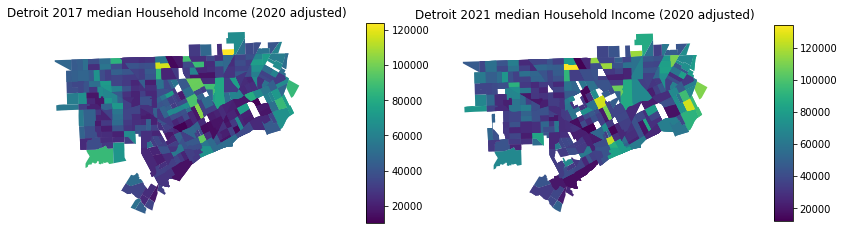

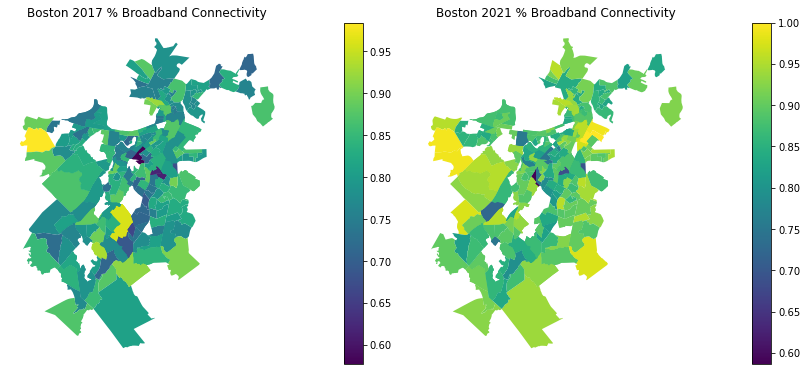

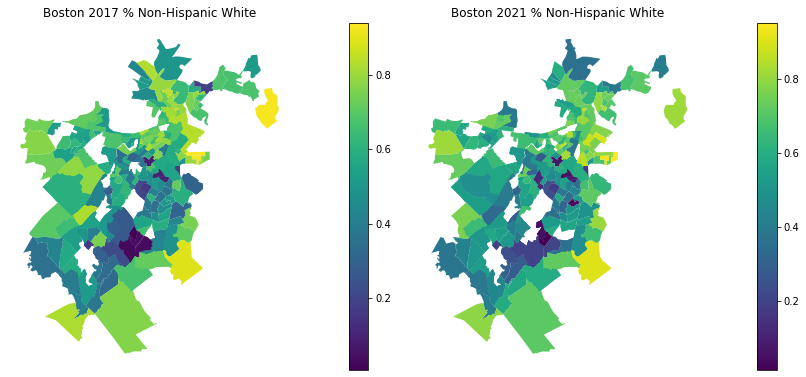

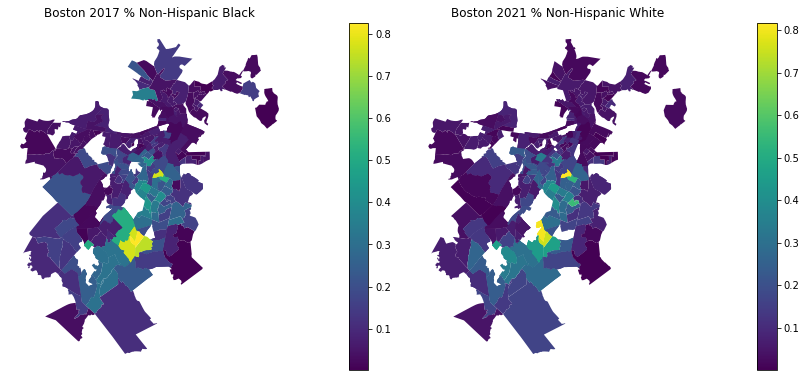

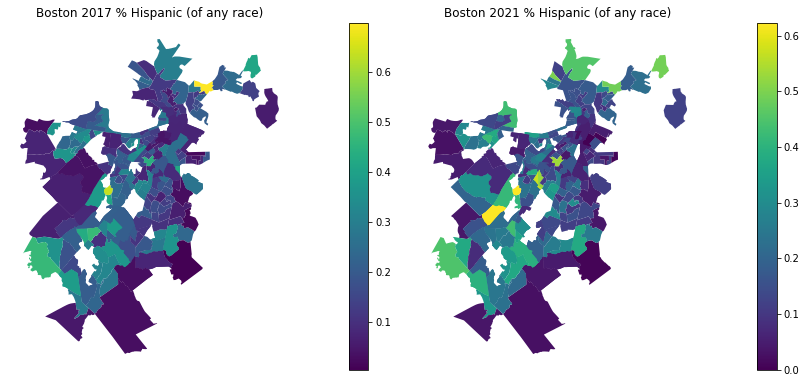

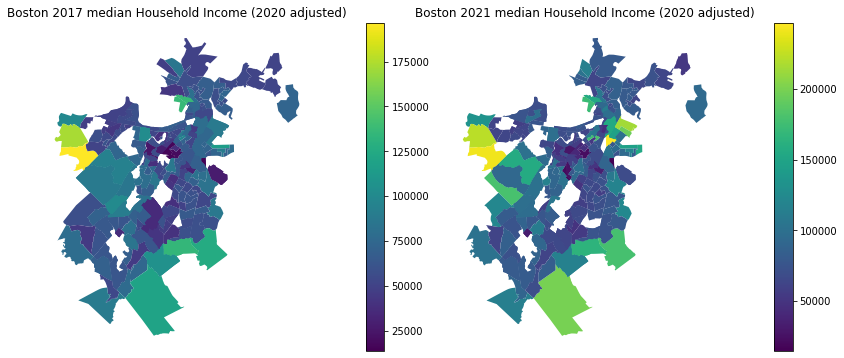

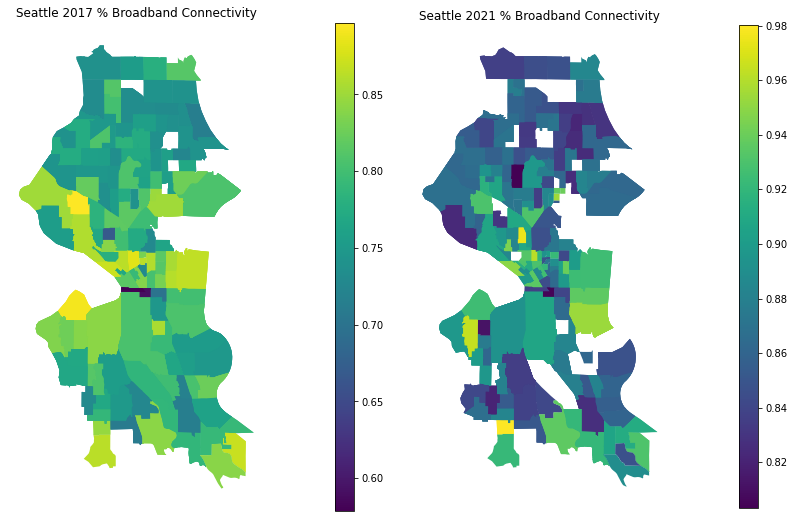

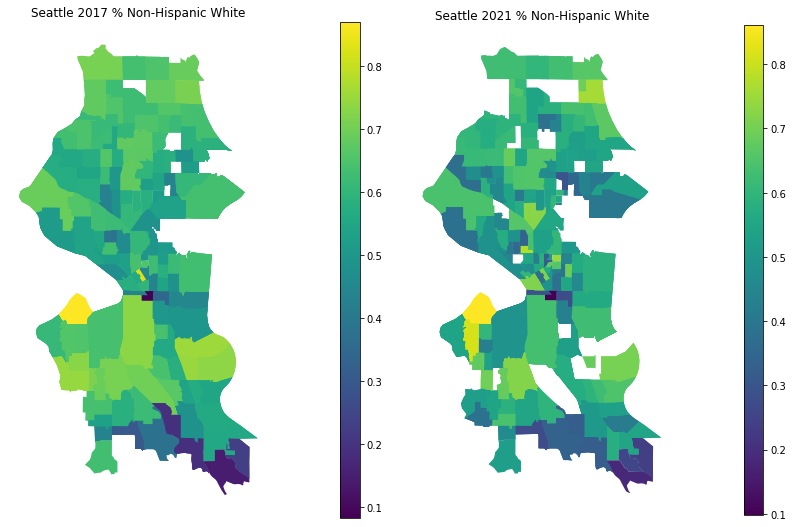

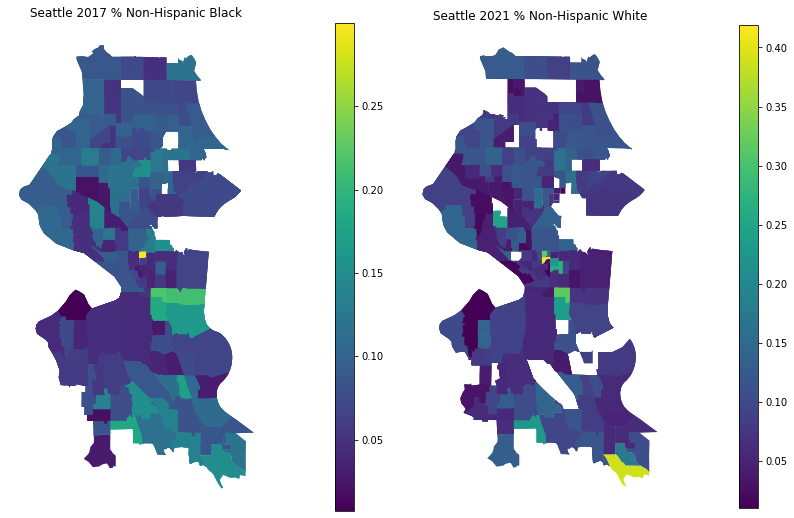

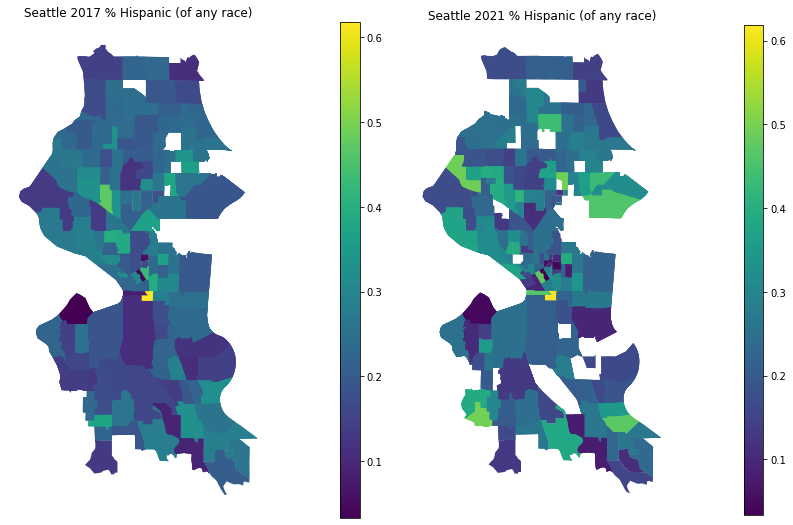

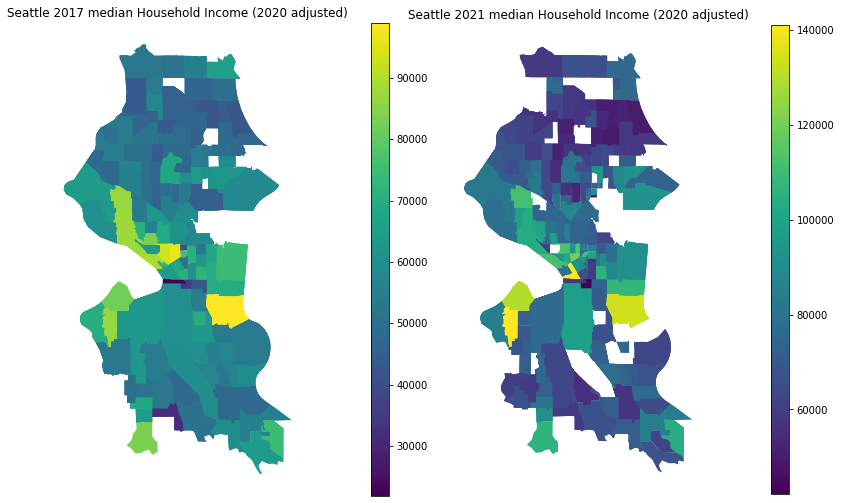

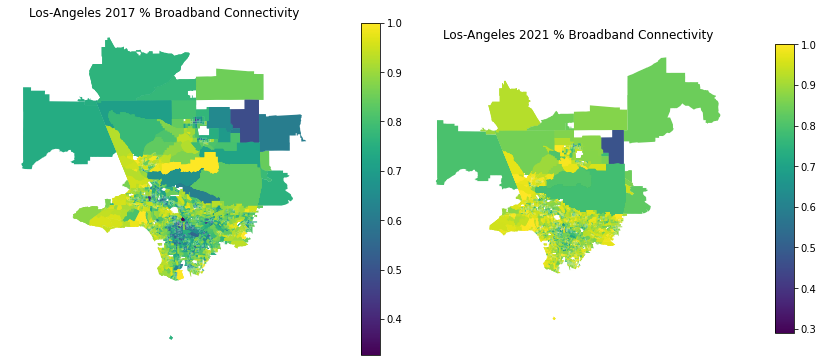

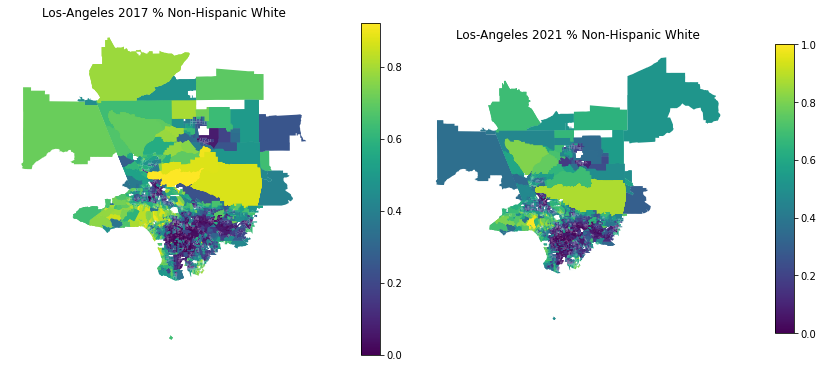

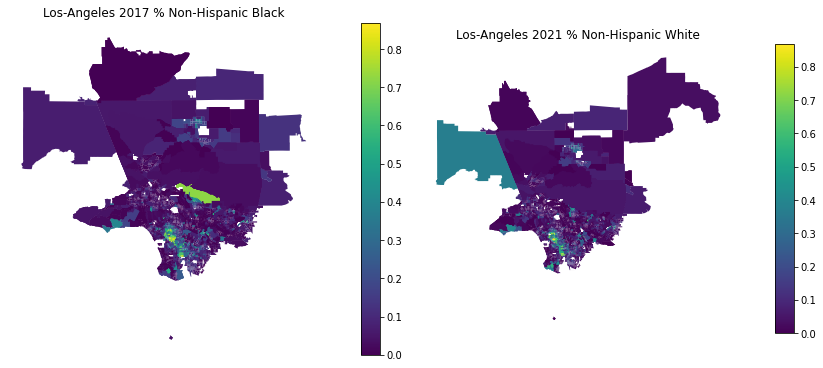

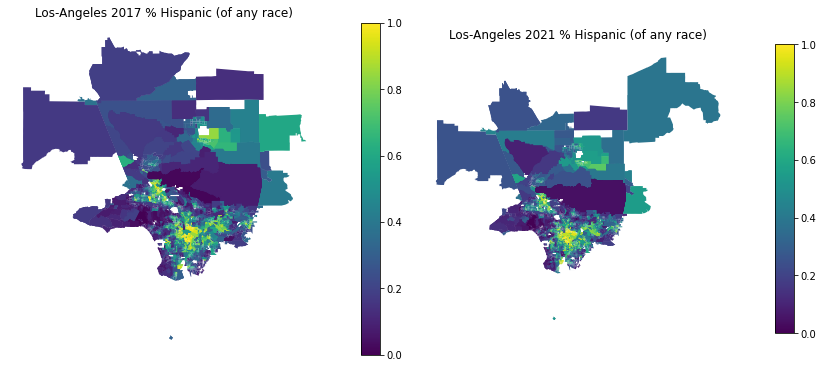

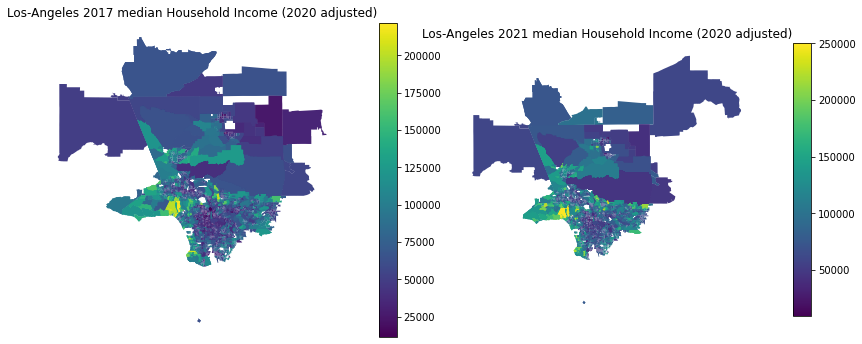

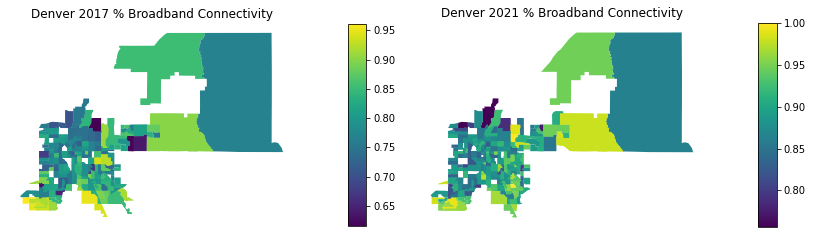

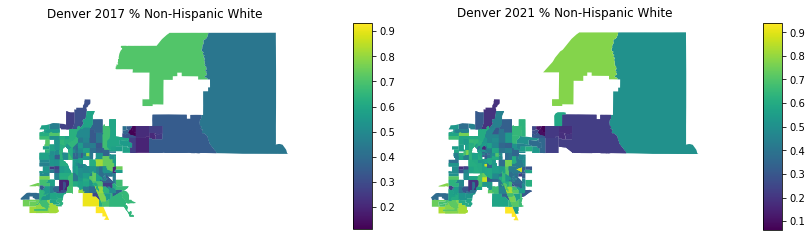

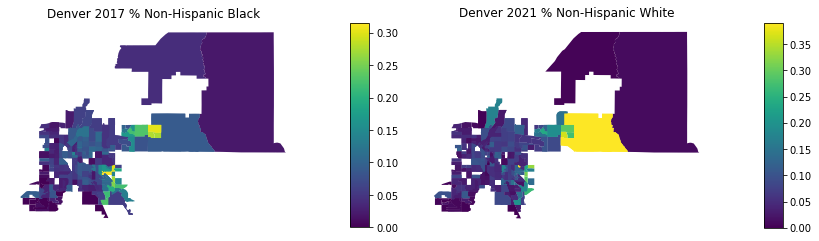

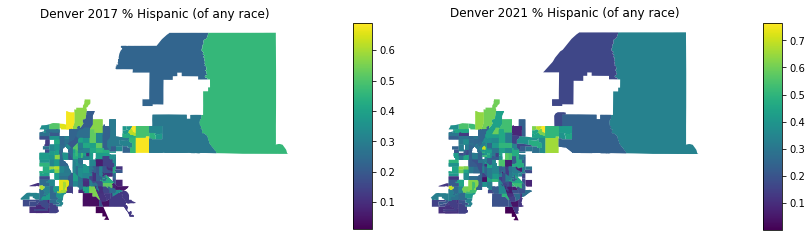

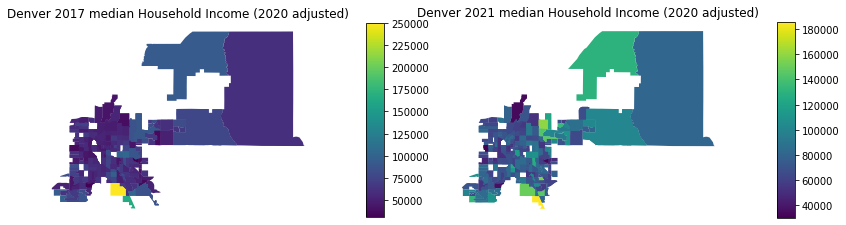

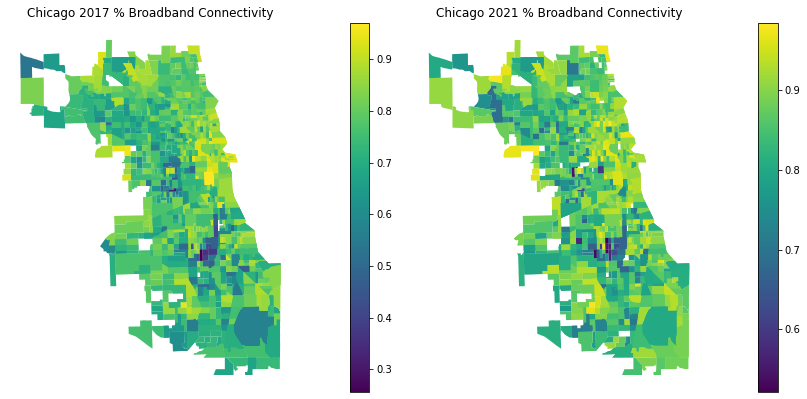

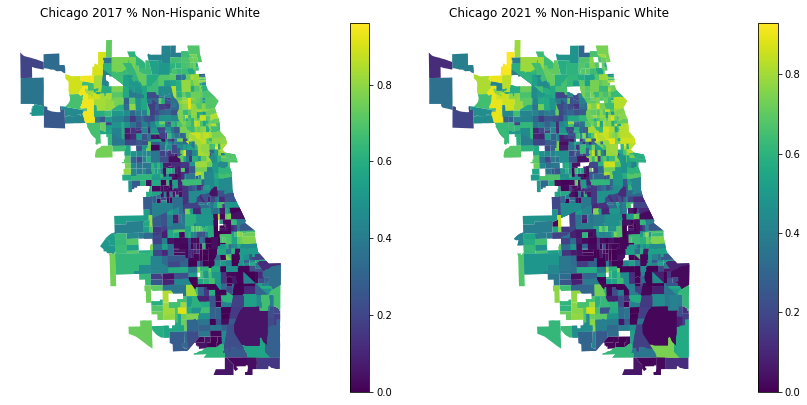

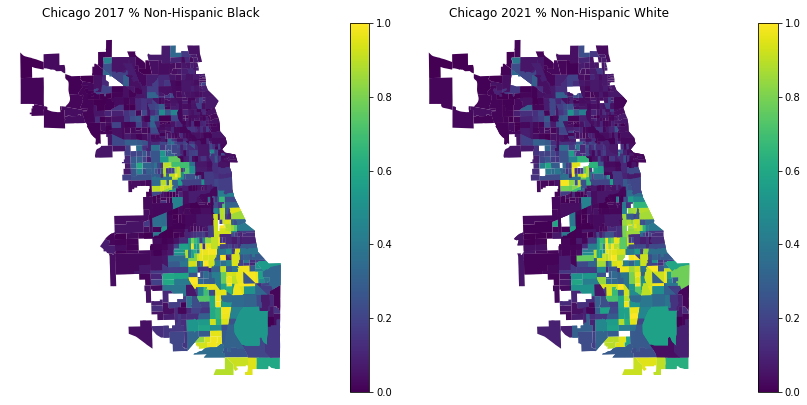

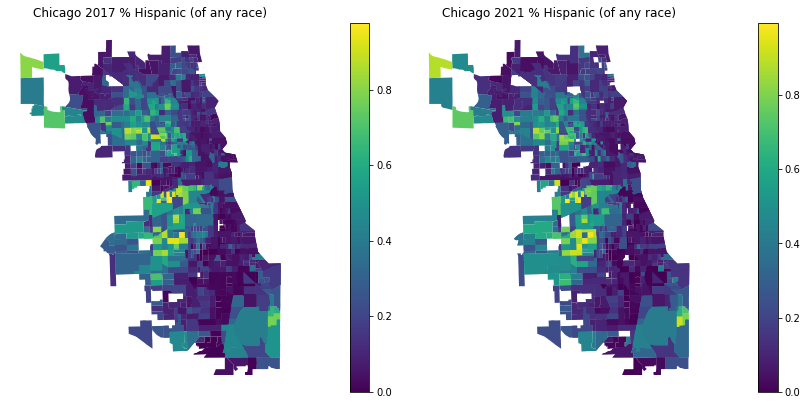

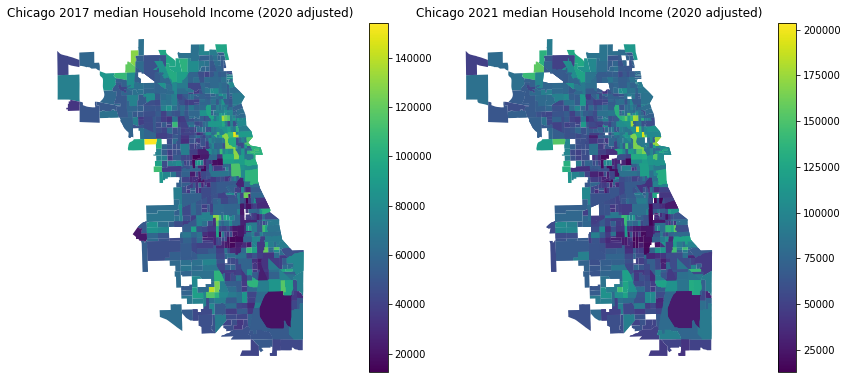

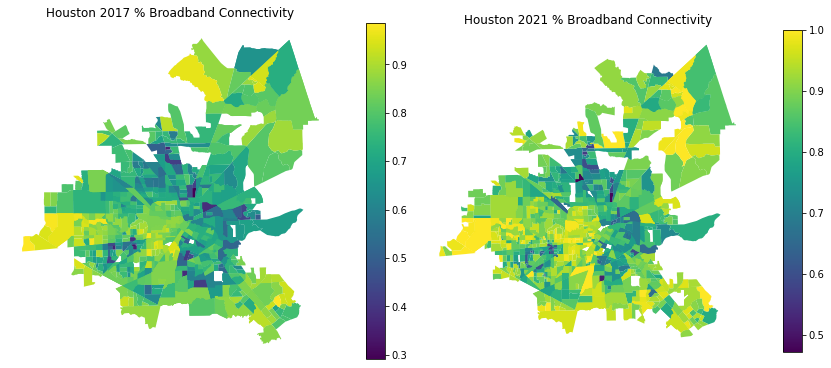

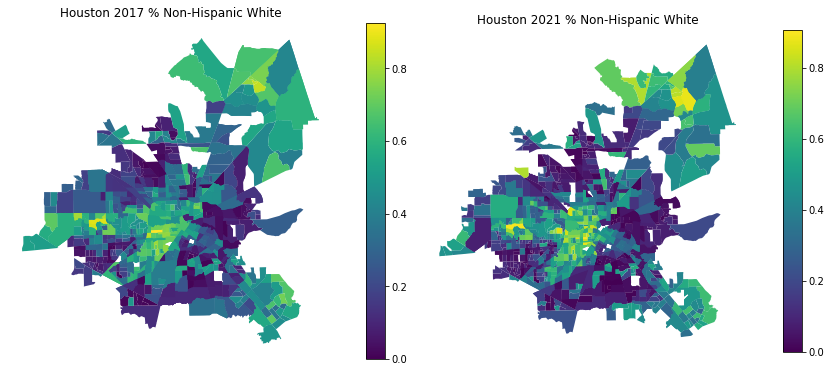

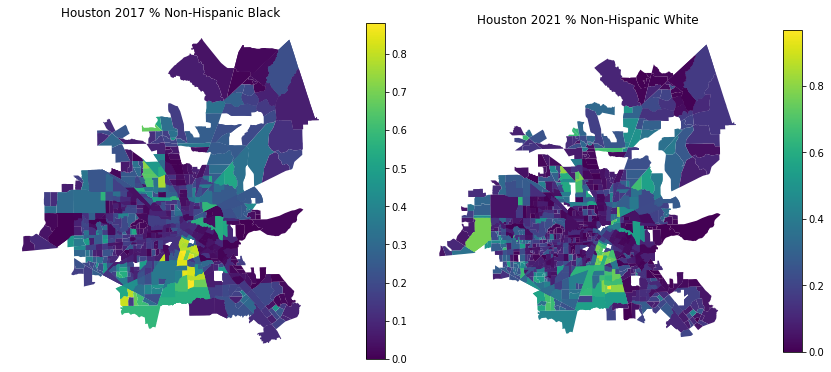

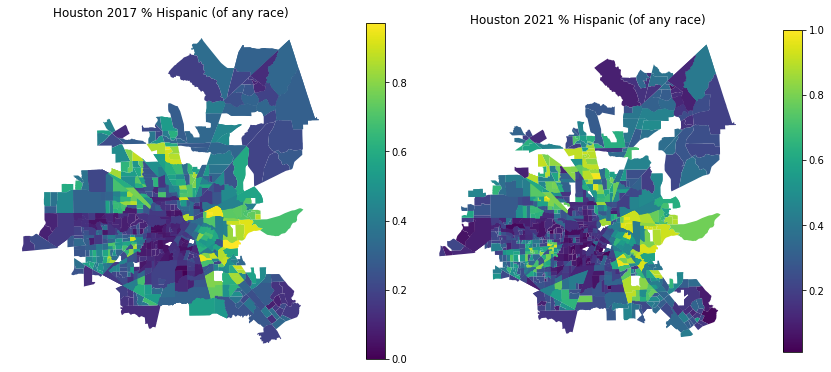

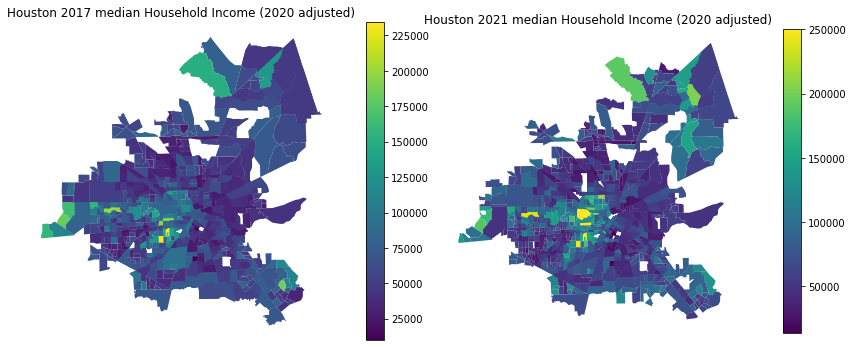

In [62]:
# generate choropleths for each city focusing on broadband, race, median household income
for city in set(acs_2021_standard_df['City']):
    city_df1 = acs_2017_standard_df[acs_2017_standard_df['City'] == city]
    city_df2 = acs_2021_standard_df[acs_2021_standard_df['City'] == city]
    plot1 = create_choropleth(city_df1, city_df2, 
                              'PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
                             title1=f'{city.title()} 2017 % Broadband Connectivity',
                             title2=f'{city.title()} 2021 % Broadband Connectivity')
    
    plot2 = create_choropleth(city_df1, city_df2,
                              '% Non-Hispanic White',
                              title1=f'{city.title()} 2017 % Non-Hispanic White',
                              title2=f'{city.title()} 2021 % Non-Hispanic White')
    
    plot3 = create_choropleth(city_df1, city_df2,
                              '% Non-Hispanic Black',
                              title1=f'{city.title()} 2017 % Non-Hispanic Black',
                              title2=f'{city.title()} 2021 % Non-Hispanic Black')
    
    plot4 = create_choropleth(city_df1, city_df2, 
                              '% Hispanic (of any race)',
                              title1=f'{city.title()} 2017 % Hispanic (of any race)',
                              title2=f'{city.title()} 2021 % Hispanic (of any race)')
    
    plot5 = create_choropleth(city_df1, city_df2, 
                              'Estimate!!Median household income in the past 12 months (in 2020 inflation-adjusted dollars) MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2020 INFLATION-ADJUSTED DOLLARS)',
                             title1=f'{city.title()} 2017 median Household Income (2020 adjusted)',
                             title2=f'{city.title()} 2021 median Household Income (2020 adjusted)')

# immigration: plot6 = create_choropleth(city_df1, city_df2, 'Estimate!!Total: PLACE OF BIRTH BY YEAR OF ENTRY FOR THE FOREIGN-BORN POPULATION')
# education: ?

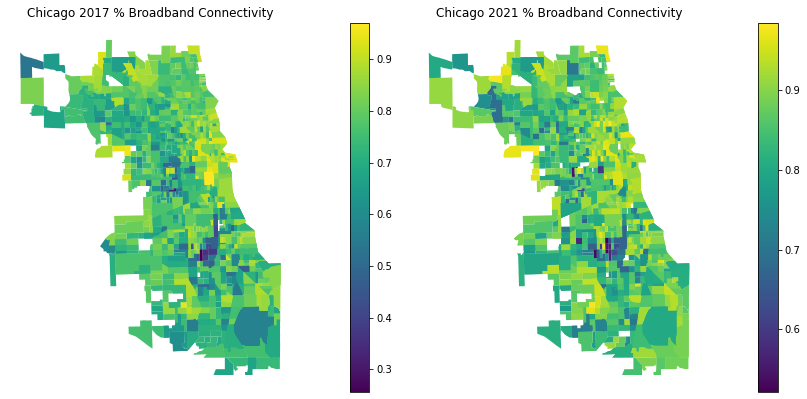

In [64]:
# generate chicago specific choropleth

# subset datasets
df1 = acs_2017_standard_df[acs_2017_standard_df['City'] == 'chicago']
df2 = acs_2021_standard_df[acs_2021_standard_df['City'] == 'chicago']

# generate plot
plot = create_choropleth(df1, df2, 
                         'PERC Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
                         title1='Chicago 2017 % Broadband Connectivity', 
                         title2='Chicago 2021 % Broadband Connectivity')